# 📓 Assignment 2: Linear Regression: Predicting Exam Scores

This notebook solves the linear regression problem to predict exam scores based on hours studied.

## Problem Task
We want to fit a linear regression line of the form:

$$
y = mx + b
$$

A new student studied **6 hours**. We want to predict the **Exam Score** using the regression equation.

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


# 1. Data Preparation and Table Completion

## Given data


In [3]:
data = {
    'Student': [1, 2, 3, 4, 5],
    'Hours_Studied': [1, 2, 3, 4, 5],
    'Exam_Score': [52, 57, 61, 65, 70]
}

df = pd.DataFrame(data)

## Calculate required columns

In [4]:
df['x_squared'] = df['Hours_Studied'] ** 2
df['x_y'] = df['Hours_Studied'] * df['Exam_Score']

## Calculate sums

In [5]:
sum_x = df['Hours_Studied'].sum()
sum_y = df['Exam_Score'].sum()
sum_x_squared = df['x_squared'].sum()
sum_x_y = df['x_y'].sum()
n = len(df)

print("Completed Table:")
print(df)
print(f"\nΣx = {sum_x}")
print(f"Σy = {sum_y}")
print(f"Σx² = {sum_x_squared}")
print(f"Σxy = {sum_x_y}")
print(f"n = {n}")

Completed Table:
   Student  Hours_Studied  Exam_Score  x_squared  x_y
0        1              1          52          1   52
1        2              2          57          4  114
2        3              3          61          9  183
3        4              4          65         16  260
4        5              5          70         25  350

Σx = 15
Σy = 305
Σx² = 55
Σxy = 959
n = 5


# 2. Compute the Slope (m)

## Calculate slope m

In [6]:
numerator_m = n * sum_x_y - sum_x * sum_y
denominator_m = n * sum_x_squared - sum_x ** 2
m = numerator_m / denominator_m

print(f"m = [{n} × {sum_x_y}] - [{sum_x} × {sum_y}] / [{n} × {sum_x_squared}] - [{sum_x}²]")
print(f"m = [{numerator_m}] / [{denominator_m}]")
print(f"m = {m:.2f}")

m = [5 × 959] - [15 × 305] / [5 × 55] - [15²]
m = [220] / [50]
m = 4.40


# 3. Compute the Intercept (b)

## Calculate intercept b

In [7]:
b = (sum_y - m * sum_x) / n

print(f"b = [{sum_y} - {m:.2f} × {sum_x}] / {n}")
print(f"b = [{sum_y - m * sum_x:.2f}] / {n}")
print(f"b = {b:.2f}")

b = [305 - 4.40 × 15] / 5
b = [239.00] / 5
b = 47.80


# 4. Regression Equation

In [8]:
print(f"Regression Equation: y = {m:.2f}x + {b:.2f}")

Regression Equation: y = 4.40x + 47.80


# 5. Calculate Predicted Values and Create Scatter Plot

## Calculate predicted values

In [9]:
df['Predicted_Score'] = m * df['Hours_Studied'] + b

print("Predicted Scores Table:")
print(df[['Student', 'Hours_Studied', 'Exam_Score', 'Predicted_Score']])

Predicted Scores Table:
   Student  Hours_Studied  Exam_Score  Predicted_Score
0        1              1          52             52.2
1        2              2          57             56.6
2        3              3          61             61.0
3        4              4          65             65.4
4        5              5          70             69.8


## Create scatter plot with regression line

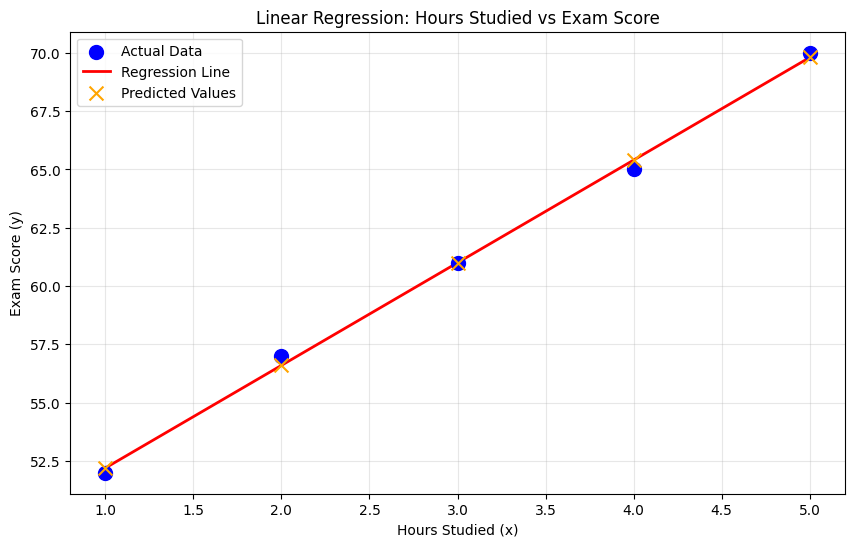

In [11]:
plt.figure(figsize=(10, 6))

# Scatter plot of actual data
plt.scatter(df['Hours_Studied'], df['Exam_Score'],
            color='blue', marker='o', s=100, label='Actual Data', zorder=5)

# Regression line
x_line = np.array([min(df['Hours_Studied']), max(df['Hours_Studied'])])
y_line = m * x_line + b
plt.plot(x_line, y_line, color='red', linewidth=2, label='Regression Line')

# Predicted points
plt.scatter(df['Hours_Studied'], df['Predicted_Score'],
            color='orange', marker='x', s=100, label='Predicted Values', zorder=5)

plt.xlabel('Hours Studied (x)')
plt.ylabel('Exam Score (y)')
plt.title('Linear Regression: Hours Studied vs Exam Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 6. Calculate Sum of Squared Erros (SSE)

## Calculate SSE

In [12]:
df['y_minus_ypredict'] = df['Exam_Score'] - df['Predicted_Score']
df['squared_error'] = df['y_minus_ypredict'] ** 2
SSE = df['squared_error'].sum()

print("Sum of Squared Errors Calculation:")
print(df[['Student', 'Hours_Studied', 'Exam_Score', 'Predicted_Score',
          'y_minus_ypredict', 'squared_error']])
print(f"\nSSE = {SSE:.2f}")

Sum of Squared Errors Calculation:
   Student  Hours_Studied  Exam_Score  Predicted_Score  y_minus_ypredict  \
0        1              1          52             52.2              -0.2   
1        2              2          57             56.6               0.4   
2        3              3          61             61.0               0.0   
3        4              4          65             65.4              -0.4   
4        5              5          70             69.8               0.2   

   squared_error  
0           0.04  
1           0.16  
2           0.00  
3           0.16  
4           0.04  

SSE = 0.40


# 7. Calculate Sum of Squared Total (SST)

## Calculate SST

In [13]:
mean_y = df['Exam_Score'].mean()
df['y_minus_mean'] = df['Exam_Score'] - mean_y
df['squared_deviation'] = df['y_minus_mean'] ** 2
SST = df['squared_deviation'].sum()

print(f"Mean (ȳ) = {sum_y} / {n} = {mean_y:.2f}")
print("\nSum of Squared Total Calculation:")
print(df[['Student', 'Hours_Studied', 'Exam_Score', 'y_minus_mean', 'squared_deviation']])
print(f"\nSST = {SST:.2f}")

Mean (ȳ) = 305 / 5 = 61.00

Sum of Squared Total Calculation:
   Student  Hours_Studied  Exam_Score  y_minus_mean  squared_deviation
0        1              1          52          -9.0               81.0
1        2              2          57          -4.0               16.0
2        3              3          61           0.0                0.0
3        4              4          65           4.0               16.0
4        5              5          70           9.0               81.0

SST = 194.00


# Compute R-squared (R²)

## Calculate R-squared (R²)

In [14]:
R_squared = 1 - (SSE / SST)

print(f"R² = 1 - (SSE / SST)")
print(f"R² = 1 - ({SSE:.2f} / {SST:.2f})")
print(f"R² = 1 - {SSE/SST:.2f}")
print(f"R² = {R_squared:.2f}")

# Interpretation
print(f"\nInterpretation: {R_squared:.1%} of the variance in exam scores is explained by hours studied.")

R² = 1 - (SSE / SST)
R² = 1 - (0.40 / 194.00)
R² = 1 - 0.00
R² = 1.00

Interpretation: 99.8% of the variance in exam scores is explained by hours studied.


# Prediction for 6 Hours Studied

## Predict for 6 hours

In [15]:
hours_6 = 6
predicted_score_6 = m * hours_6 + b

print(f"Prediction for 6 hours studied:")
print(f"y = {m:.2f} × {hours_6} + {b:.2f}")
print(f"y = {predicted_score_6:.2f}")

Prediction for 6 hours studied:
y = 4.40 × 6 + 47.80
y = 74.20


# Summary of Results

In [16]:
print("=" * 50)
print("SUMMARY OF LINEAR REGRESSION ANALYSIS")
print("=" * 50)
print(f"Regression Equation: y = {m:.2f}x + {b:.2f}")
print(f"Slope (m): {m:.2f}")
print(f"Intercept (b): {b:.2f}")
print(f"Sum of Squared Errors (SSE): {SSE:.2f}")
print(f"Sum of Squared Total (SST): {SST:.2f}")
print(f"R-squared (R²): {R_squared:.2f}")
print(f"Predicted score for 6 hours: {predicted_score_6:.2f}")
print("=" * 50)

SUMMARY OF LINEAR REGRESSION ANALYSIS
Regression Equation: y = 4.40x + 47.80
Slope (m): 4.40
Intercept (b): 47.80
Sum of Squared Errors (SSE): 0.40
Sum of Squared Total (SST): 194.00
R-squared (R²): 1.00
Predicted score for 6 hours: 74.20


# Create final results table

In [17]:
results_summary = pd.DataFrame({
    'Metric': ['Σx', 'Σy', 'Σx²', 'Σxy', 'n', 'Slope (m)', 'Intercept (b)', 'SSE', 'SST', 'R²', 'Prediction (6 hours)'],
    'Value': [sum_x, sum_y, sum_x_squared, sum_x_y, n, f"{m:.2f}", f"{b:.2f}",
              f"{SSE:.2f}", f"{SST:.2f}", f"{R_squared:.2f}", f"{predicted_score_6:.2f}"]
})

print("\nFinal Results Table:")
print(results_summary.to_string(index=False))


Final Results Table:
              Metric  Value
                  Σx     15
                  Σy    305
                 Σx²     55
                 Σxy    959
                   n      5
           Slope (m)   4.40
       Intercept (b)  47.80
                 SSE   0.40
                 SST 194.00
                  R²   1.00
Prediction (6 hours)  74.20
